**IMPORTS AND LOADING THE DATA**

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

2024-03-08 19:57:25.718071: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-08 19:57:25.718236: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-08 19:57:25.764665: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-08 19:57:25.873511: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-08 19:57:27.567725: W tensorflow/compiler/tf2

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
(X_train,y_train), (X_test,y_test) = fashion_mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
X_train[20000,3,15]

0

In [8]:
X_train[0,23,26]

170

In [9]:
y_train[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

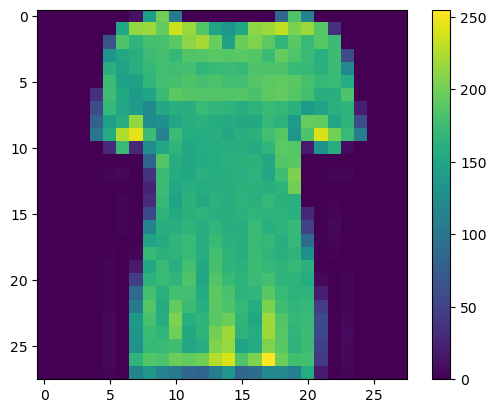

In [10]:
plt.imshow(X_train[10])
plt.colorbar()

**DATA PREPROCESSING**

In [11]:
X_train = X_train/255
X_test = X_test/255

**BUILDING AND TRAINING THE MODEL**

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(392,activation='softmax'),
    keras.layers.Dense(10,activation='softmax')
])

2024-03-08 19:57:32.152989: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [13]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [14]:
model.fit(X_train,y_train,epochs=50)
keras.backend.clear_session()

Epoch 1/50
1875/1875 [==============================] - 13s 6ms/step - loss: 1.3681 - accuracy: 0.6834
Epoch 2/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7338 - accuracy: 0.7432
Epoch 3/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6144 - accuracy: 0.7526
Epoch 4/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5780 - accuracy: 0.7580
Epoch 5/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5605 - accuracy: 0.7620
Epoch 6/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5492 - accuracy: 0.7658
Epoch 7/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5405 - accuracy: 0.7708
Epoch 8/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5325 - accuracy: 0.7781
Epoch 9/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5199 - accuracy: 0.7936
Epoch 10/50
1875/1875 [==============================] - 12s 6ms/step - l

**EVALUATIONS AND PREDICTIONS**

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 0.4574 - accuracy: 0.8469


In [16]:
predictions = model.predict(X_train)

1875/1875 [==============================] - 7s 3ms/step


In [17]:
predictions[10].argmax()

0

In [18]:
class_names[0]

'T-shirt/top'

In [19]:
predictions[10,0]

0.67693645

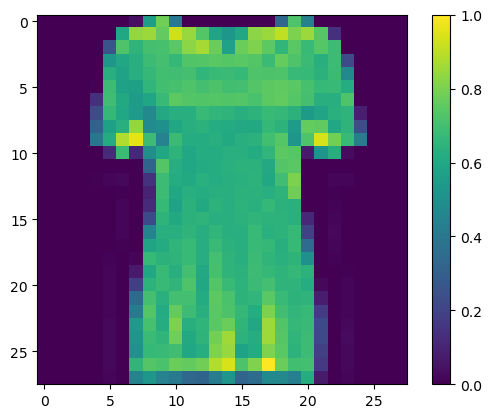

In [20]:
plt.imshow(X_train[10])
plt.colorbar()

**As we can see,our model correctly predicted the class!**